In [1]:
import torch
import numpy as np
import torchvision.models as models
import Custom as CustomDataset
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [9]:
"""
Do not run this code block without cuda()
"""
vgg16 = models.vgg16(pretrained=True).cuda()
#vgg16 = models.vgg16(pretrained=True)
customDataloader = CustomDataset.main() #for dataloader

for param in vgg16.parameters():
    param.requires_grad = False
    # Replace the last fully-connected layer
    # Parameters of newly constructed modules have requires_grad=True by default
vgg16_fcn = vgg16.features # assuming that the fc7 layer has 512 neurons, otherwise change it 
vgg16_fcn.cuda()


~~~| Custom.py Execution |~~~
Loaded dataset
~~~| Custom.py Complete |~~~



Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

In [10]:
xin = Variable(torch.rand(size=(4, 3, 224, 224)).cuda())

In [11]:
xin.shape

torch.Size([4, 3, 224, 224])

In [12]:
out = vgg16_fcn(xin)
out.shape

torch.Size([4, 512, 7, 7])

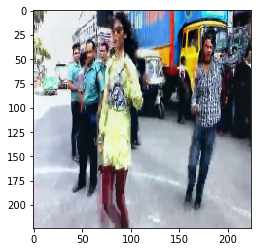

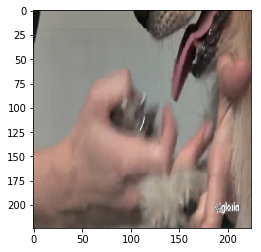

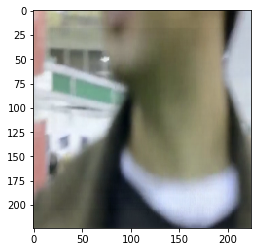

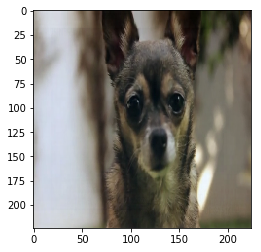

In [10]:
for batch_i, data in enumerate(customDataloader): 
        for i in range(len(data['video'])):
            currSegment = data['video'][i]
            showFrame = data['video'][i][0]
            plt.imshow(showFrame.numpy())
            plt.show(block=False)
            
            batchData = data
        break

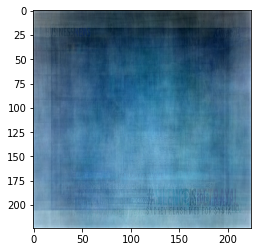

tensor(0)


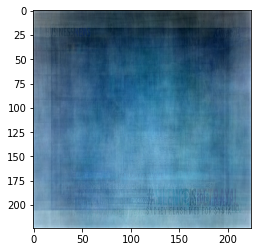

tensor(0)


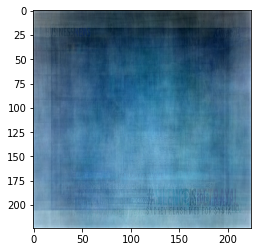

tensor(0)


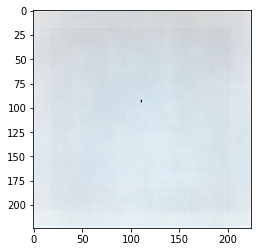

tensor(0)


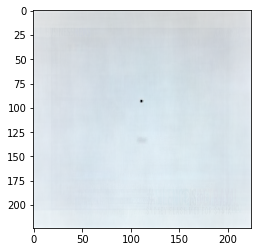

tensor(0)


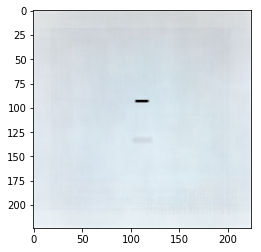

tensor(0)


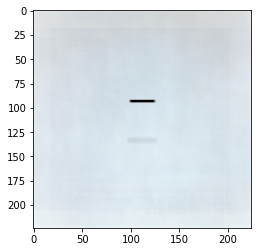

tensor(0)


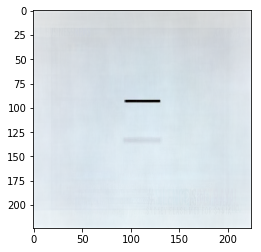

tensor(0)


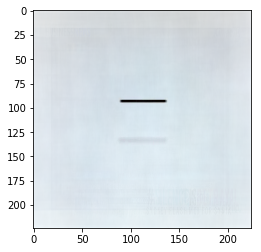

tensor(0)


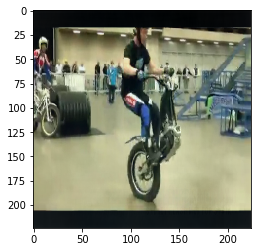

tensor(0)


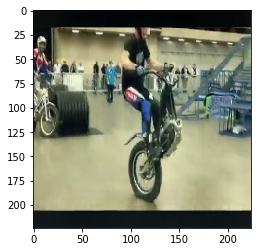

tensor(0)


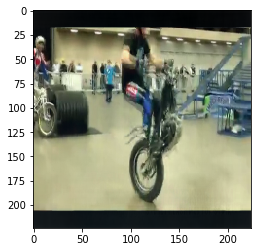

tensor(0)


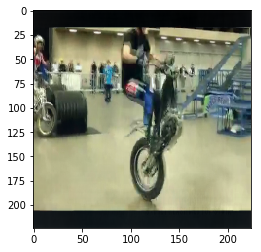

tensor(0)


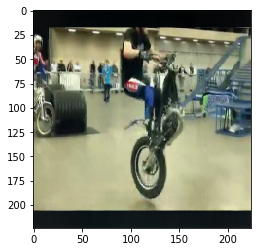

tensor(0)


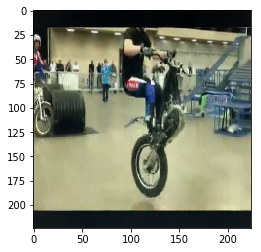

tensor(0)


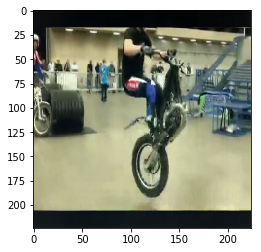

tensor(0)


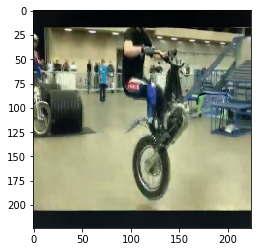

tensor(0)


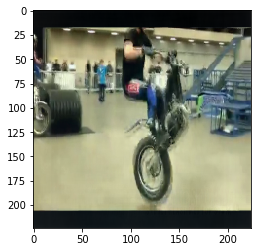

tensor(0)


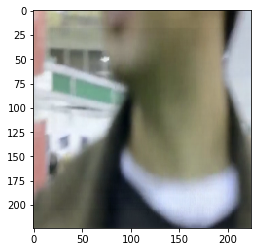

tensor(0)


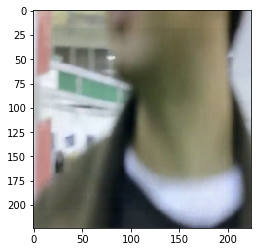

tensor(0)


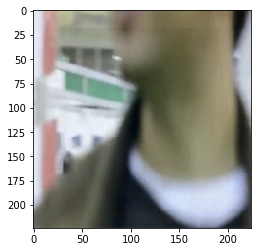

tensor(0)


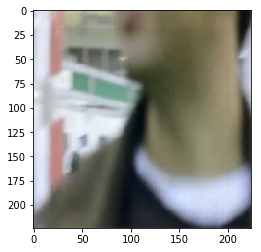

tensor(0)


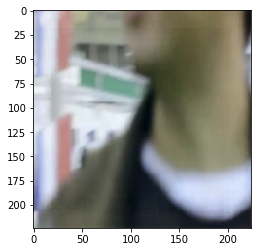

tensor(0)


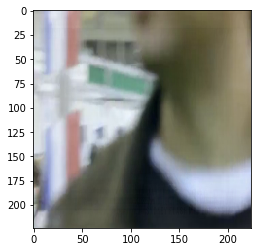

tensor(0)


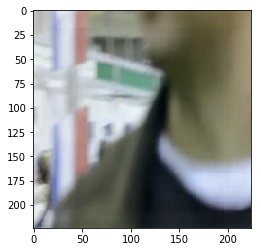

tensor(0)


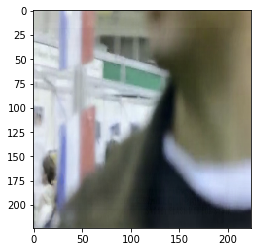

tensor(0)


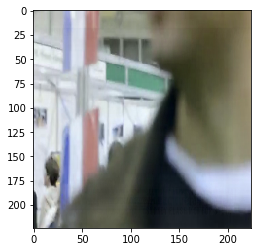

tensor(0)


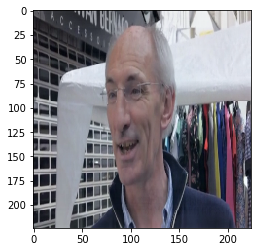

tensor(0)


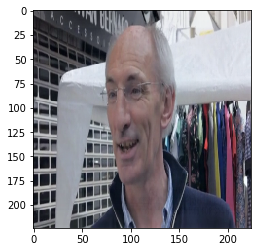

tensor(0)


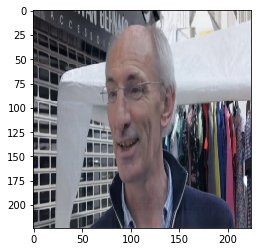

tensor(0)


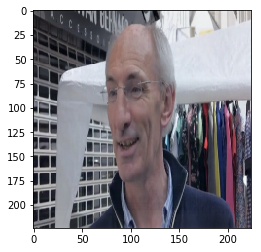

tensor(0)


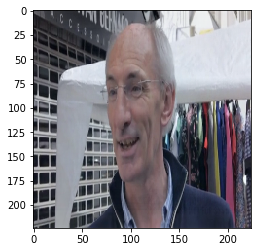

tensor(0)


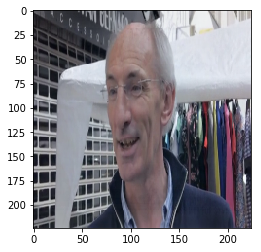

tensor(0)


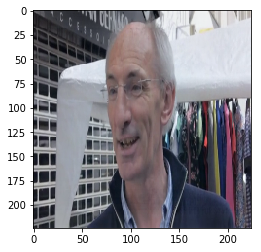

tensor(0)


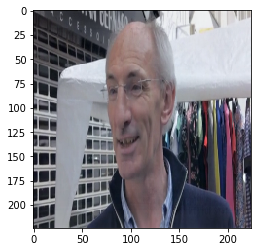

tensor(0)


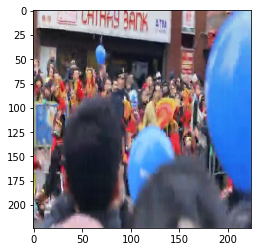

tensor(1)


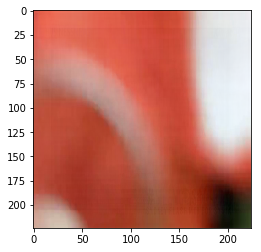

tensor(0)


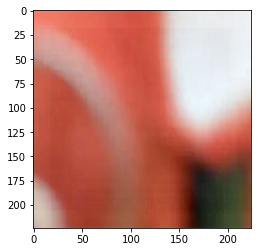

tensor(0)


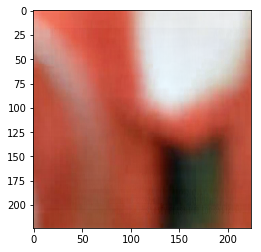

tensor(0)


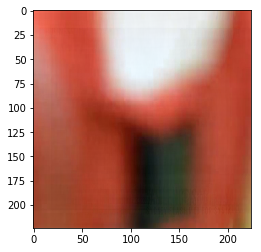

tensor(0)


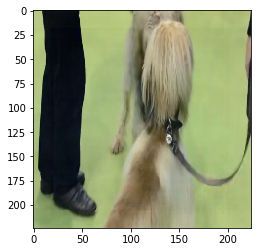

tensor(0)


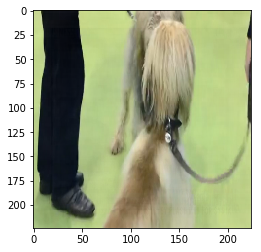

tensor(0)


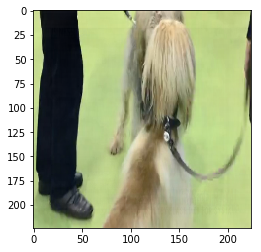

tensor(0)


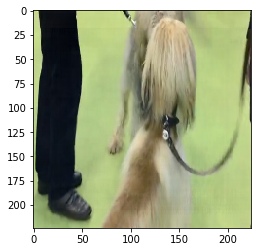

tensor(0)


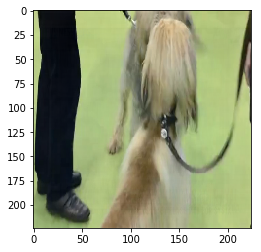

tensor(0)


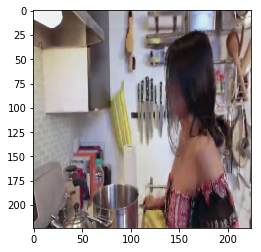

tensor(0)


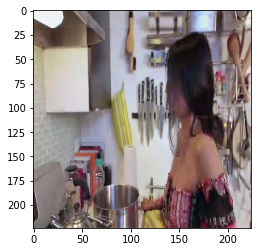

tensor(0)


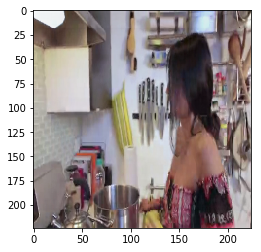

tensor(0)


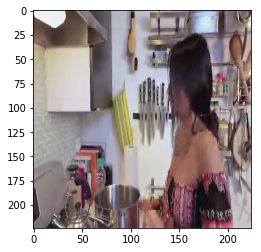

tensor(0)


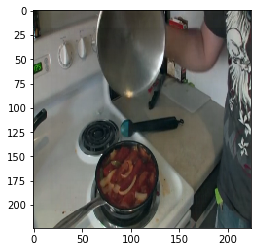

tensor(1)


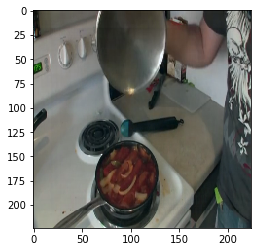

tensor(0)


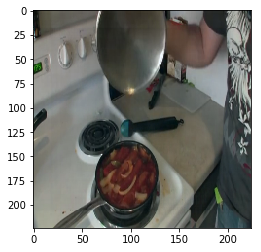

tensor(0)


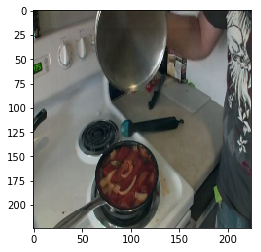

tensor(0)


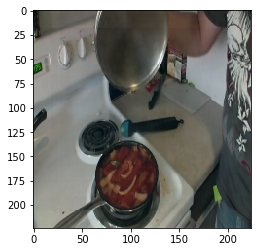

tensor(0)


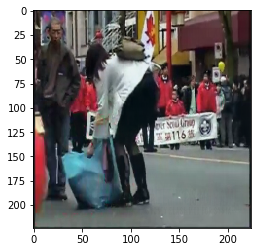

tensor(0)


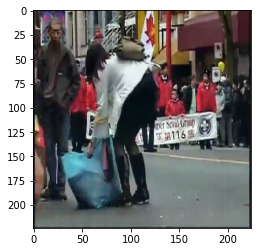

tensor(0)


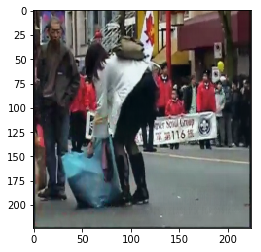

tensor(0)


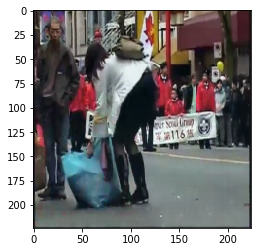

tensor(0)


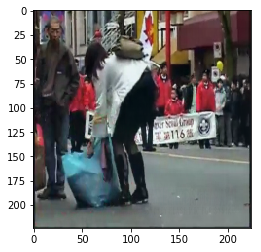

tensor(0)


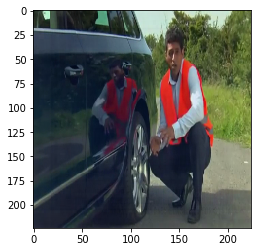

tensor(1)


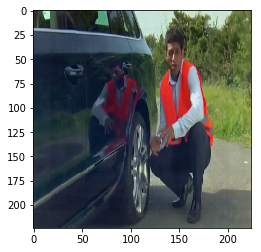

tensor(0)


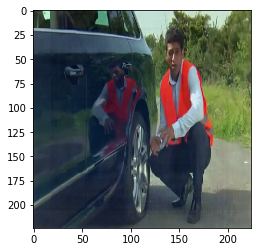

tensor(0)


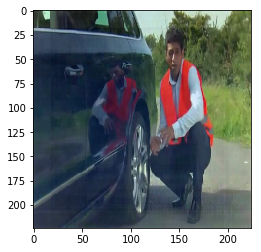

tensor(0)


KeyboardInterrupt: 

In [4]:
for batch_i, data in enumerate(customDataloader):
    for seg in range(len(data['video'])):
        #print(data['video'][seg].shape)
        #print(len(data['video'][seg]))
        
        """
        #Sequence length x Width x Height x RGB channels
        data['video'][seg] - 30 x 224 x 224 x 3
        
        swapFrame = np.swapaxes(currSegment.numpy(), 1, 3)
        Convert to 30 x 3 x Height x Width
        
        matplotlib expects Width x Height x RGB channels
        plt.imshow(data['video'][seg][frame].numpy()) 
        plt.show(block=False)
        """
        for frame in range(len(data['video'][seg])):
                plt.imshow(data['video'][seg][frame].numpy())
                #print(data['video'][seg][frame].shape)
                plt.show(block=False)
                print(data['scores'][frame][seg])

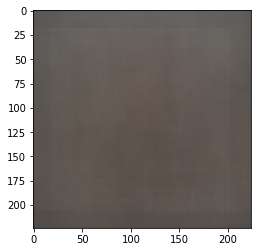

In [13]:
mean = torch.load('mean.pt')
plt.imshow(mean)
plt.show(block=False)

In [5]:
print(test['scores'])

[tensor([0, 0, 0, 0]), tensor([0, 0, 0, 0]), tensor([0, 0, 0, 0]), tensor([0, 0, 0, 0]), tensor([0, 0, 0, 0]), tensor([0, 0, 0, 0]), tensor([1, 0, 0, 0]), tensor([0, 0, 0, 0]), tensor([0, 0, 0, 0])]


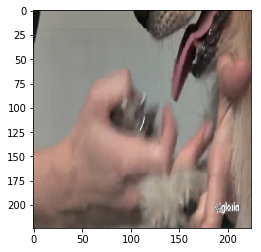

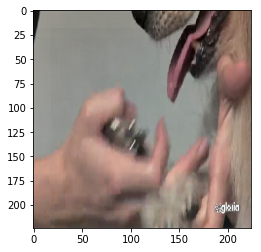

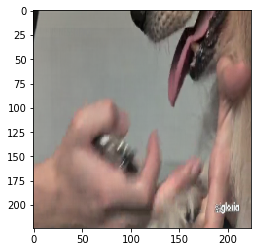

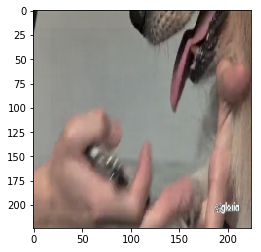

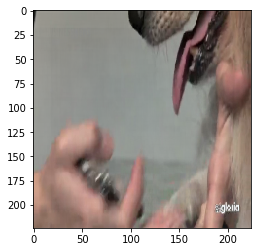

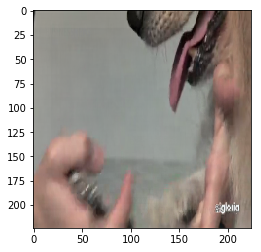

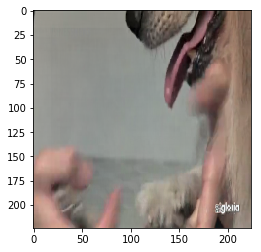

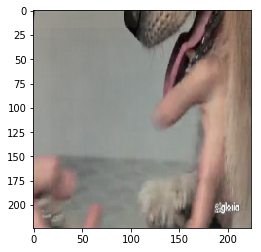

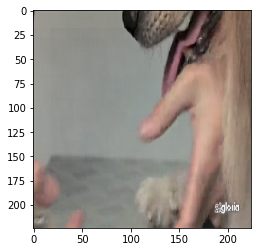

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7], [6, 7, 8]]


In [12]:
def getDataPoint(element, index):
    scores = []
    for frame in range(len(element['video'][index])):
        video = element['video'][index]
        plt.imshow(video[frame].numpy())
        #print(data['video'][seg][frame].shape)
        plt.show(block=False)
        #print(element['scores'][frame][index])
        scores.append(int(element['scores'][frame][index]))
    points = np.zeros((7,3), dtype=int)
    frames = np.add(*np.indices((7, 3)))
    if (1 in scores):
        boundary = scores.index(1)
        for i in range(7):
            for j in range(3):
                frames[i][j] = i + j
                if (i + j == boundary):
                    points[i][j] = 1
    return points.tolist(), frames.tolist()

#Change index between 0-3 to get different data points
scoreList, frameNums = getDataPoint(batchData, 1l)
print(scoreList)
print(frameNums)



In [ ]:
for i in range(len(data['video'])):
            #print(data['video'][i].shape)
            #for j in range(len(currSegment)):
                #Models expect 3xHxW
                #Current format before swaps, WxHx3
                #print(torch.tensor(swapFrame).unsqueeze(0).shape)
                #frame = vgg16(torch.tensor(swapFram
            #print(data['video'][i].numpy().shape)
            #print(data['video'][i].shape)
            currSegment = data['video'][i]
            print(currSegment.shape)
            swapFrame = np.swapaxes(currSegment.numpy(), 1, 3)
            print(swapFrame.shape)
            #print(torch.tensor(swapFrame[0]).unsqueeze(0).shape)
            #Models expect 3xHxW
            #Current format before swaps, WxHx3
            frame = vgg16(torch.tensor(swapFrame[0]).unsqueeze(0).float().cuda())

In [ ]:
import torch.nn as nn
from torch.nn.parameter import Parameter
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        
        vgg
        l = torch.nn.LSTM(8*8*64, 256, 1, True, True, 0.5);
        fc = nn.Linear(256,1)
        
    def forward(self, x):
        
        for ol1
        
        4, 3, 8*8*64
        
        
        
        o1 = l(x)
        for t in range(3):
        